In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf


In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2024-03-30 05:15:15--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.201.207, 74.125.69.207, 64.233.181.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.201.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   212MB/s    in 0.5s    

2024-03-30 05:15:15 (212 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak/

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [ ]:
import os

for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath} .')

There are 2 directories and 0 images in pizza_steak .
There are 2 directories and 0 images in pizza_steak/test .
There are 0 directories and 250 images in pizza_steak/test/steak .
There are 0 directories and 250 images in pizza_steak/test/pizza .
There are 2 directories and 0 images in pizza_steak/train .
There are 0 directories and 750 images in pizza_steak/train/steak .
There are 0 directories and 750 images in pizza_steak/train/pizza .


In [ ]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [ ]:
import pathlib
data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
    target_folder = os.path.join(target_dir, target_class)

    # List all files in the target folder
    all_files = os.listdir(target_folder)

    # Select a random file from the list
    random_image_name = np.random.choice(all_files)
    print(random_image_name)

    # Load the image
    img = mpimg.imread(os.path.join(target_folder, random_image_name))

    # Plot the image
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')

    print(f'Image Shape : {img.shape}')

    return img

1054420.jpg
Image Shape : (512, 306, 3)


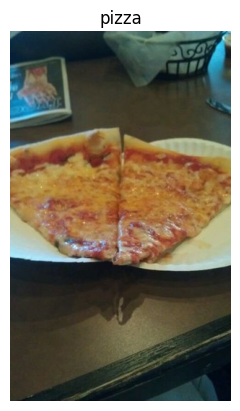

In [ ]:
img_pizza = view_random_image(target_dir='pizza_steak/train/',
                        target_class = 'pizza')

2748917.jpg
Image Shape : (288, 512, 3)


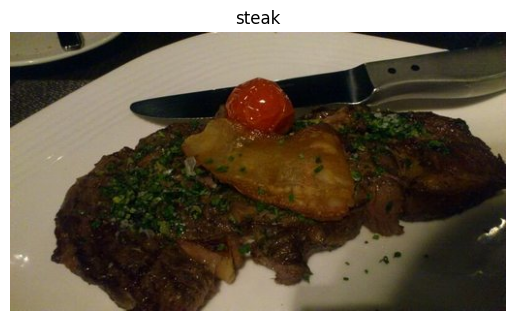

In [ ]:
img_steak = view_random_image(target_dir='pizza_steak/train/',
                        target_class = 'steak')

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1/255)
valid_datagen = ImageDataGenerator(rescale=1/255)

train_dir = 'pizza_steak/train'
valid_dir = 'pizza_steak/test'

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=valid_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)



model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu',input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu',input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2,padding='valid'),
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu',input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu',input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')])


model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 115s 2s/step - loss: 0.6095 - accuracy: 0.6593 - val_loss: 0.4476 - val_accuracy: 0.8360
Epoch 2/5
47/47 [==============================] - 111s 2s/step - loss: 0.4651 - accuracy: 0.7787 - val_loss: 0.3665 - val_accuracy: 0.8660
Epoch 3/5
47/47 [==============================] - 113s 2s/step - loss: 0.4051 - accuracy: 0.8240 - val_loss: 0.3368 - val_accuracy: 0.8740
Epoch 4/5
47/47 [==============================] - 113s 2s/step - loss: 0.3413 - accuracy: 0.8560 - val_loss: 0.2960 - val_accuracy: 0.8800
Epoch 5/5
47/47 [==============================] - 104s 2s/step - loss: 0.3415 - accuracy: 0.8573 - val_loss: 0.3233 - val_accuracy: 0.8660


In [ ]:
# one batch
images, labels = train_data.next()
len(images),len(labels)

(32, 32)

In [ ]:
# total batch
len(train_data)

47

In [ ]:
images[0],images[0].shape

(array([[[0.59607846, 0.54901963, 0.36078432],
         [0.59607846, 0.5411765 , 0.34901962],
         [0.5921569 , 0.5294118 , 0.32941177],
         ...,
         [0.        , 0.        , 0.01568628],
         [0.00392157, 0.        , 0.02352941],
         [0.00392157, 0.        , 0.02352941]],
 
        [[0.6       , 0.5568628 , 0.37647063],
         [0.61960787, 0.57254905, 0.38431376],
         [0.61960787, 0.5686275 , 0.3647059 ],
         ...,
         [0.00784314, 0.        , 0.01960784],
         [0.00784314, 0.        , 0.01960784],
         [0.01176471, 0.00392157, 0.02352941]],
 
        [[0.5921569 , 0.56078434, 0.3803922 ],
         [0.6156863 , 0.5686275 , 0.3803922 ],
         [0.6156863 , 0.5647059 , 0.36078432],
         ...,
         [0.00784314, 0.        , 0.01176471],
         [0.01176471, 0.00392157, 0.01568628],
         [0.01176471, 0.00392157, 0.01568628]],
 
        ...,
 
        [[0.57254905, 0.6039216 , 0.64705884],
         [0.5803922 , 0.6117647 , 0.65490

In [ ]:
labels

array([1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0.],
      dtype=float32)

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 177ms/step - loss: 0.8995 - accuracy: 0.5027 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 200ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 200ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 195ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 183ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
  Conv2D(filters=10, # filter is the number of sliding windows going across an input (higher = more complex model)
         kernel_size=(3, 3), # the size of the sliding window going across an input
         strides=(1, 1), # the size of the step the sliding window takes across an input
         padding="valid", # if "same", output shape is same as input shape, if "valid", output shape gets compressed
         activation="relu",
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  Flatten(),
  Dense(1, activation="sigmoid") # output layer (working with binary classification so only 1 output neuron)
])

In [ ]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
model_4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_2 (Flatten)         (None, 475240)            0         
                                                                 
 dense_4 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Check the lengths of training and test data generators
len(train_data), len(valid_data)

(47, 16)

In [ ]:
history_4 = model_4.fit(train_data, # this is a combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 151s 3s/step - loss: 0.7491 - accuracy: 0.6533 - val_loss: 0.4458 - val_accuracy: 0.7680
Epoch 2/5
47/47 [==============================] - 138s 3s/step - loss: 0.4054 - accuracy: 0.8273 - val_loss: 0.3633 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 130s 3s/step - loss: 0.2900 - accuracy: 0.8893 - val_loss: 0.3767 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 121s 3s/step - loss: 0.1800 - accuracy: 0.9413 - val_loss: 0.3657 - val_accuracy: 0.8120
Epoch 5/5
47/47 [==============================] - 122s 3s/step - loss: 0.0918 - accuracy: 0.9747 - val_loss: 0.3947 - val_accuracy: 0.8280


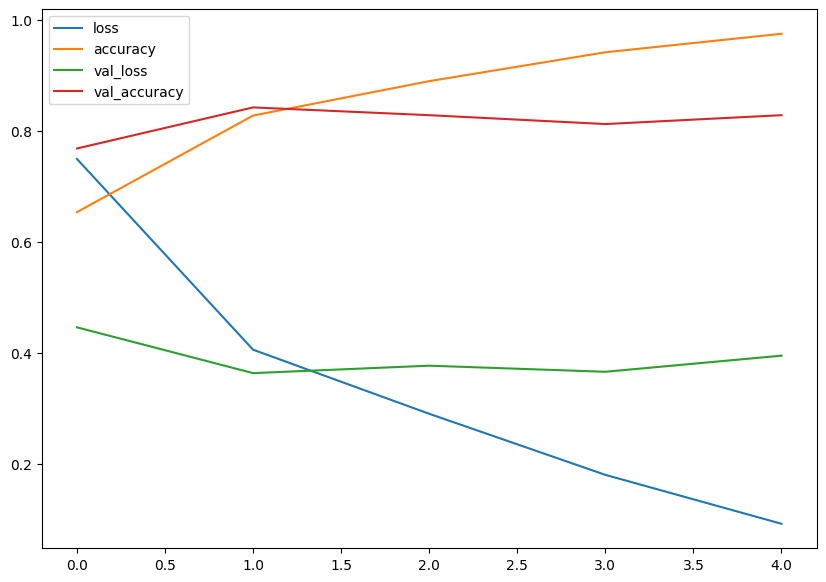

In [ ]:
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [ ]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for?

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();


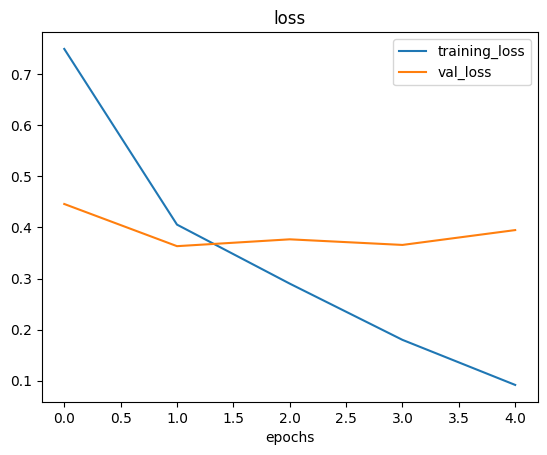

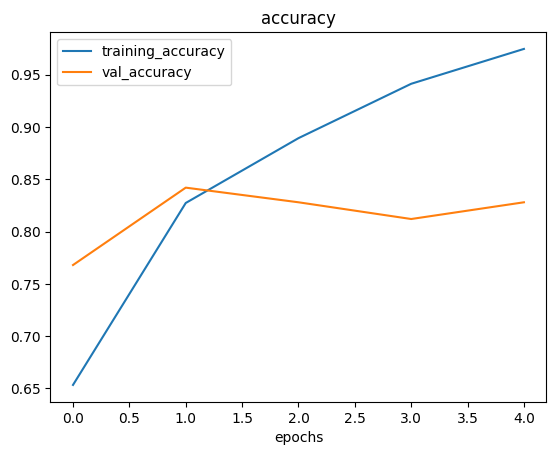

In [ ]:
plot_loss_curves(history_4)

Overfitting

In [ ]:
import tensorflow as tf

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen_augmented = ImageDataGenerator(rescale=1/255,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

train_datagen = ImageDataGenerator(rescale=1/255)

test_datagen = ImageDataGenerator(rescale=1/255)

In [ ]:
print('Augmented training data :')
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                      target_size=(224,224),
                                                                      batch_size=32,
                                                                      class_mode='binary',
                                                                      shuffle=False)

print('Non-Augmented training data :')
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               shuffle=False)

IMG_SIZE =(224,224)
print('Non-augmented test data :')
test_data = test_datagen.flow_from_directory(valid_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode='binary')



Augmented training data :
Found 1500 images belonging to 2 classes.
Non-Augmented training data :
Found 1500 images belonging to 2 classes.
Non-augmented test data :
Found 500 images belonging to 2 classes.


In [ ]:
images, labels = train_data.next()
augmented_images, augemented_labels = train_data_augmented.next()

showing image number : 7


(-0.5, 223.5, 223.5, -0.5)

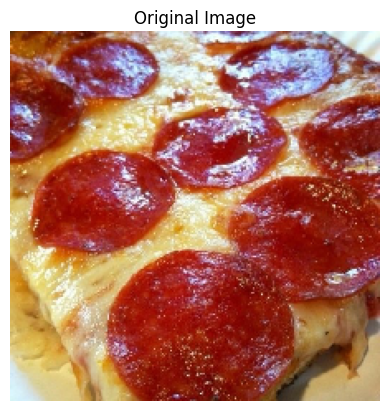

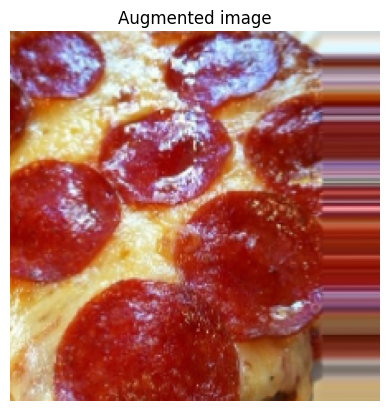

In [ ]:
import random
random_number = random.randint(0,31)
print(f'showing image number : {random_number}')
plt.imshow(images[random_number])
plt.title('Original Image')
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title('Augmented image')
plt.axis(False)

In [ ]:
model_6 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2)),
    tf.keras.layers.Conv2D(filters=10, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')])

model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 72s 2s/step - loss: 0.8067 - accuracy: 0.5093 - val_loss: 0.6886 - val_accuracy: 0.5360
Epoch 2/5
47/47 [==============================] - 69s 1s/step - loss: 0.6881 - accuracy: 0.5100 - val_loss: 0.6609 - val_accuracy: 0.5020
Epoch 3/5
47/47 [==============================] - 69s 1s/step - loss: 0.8943 - accuracy: 0.5493 - val_loss: 0.6902 - val_accuracy: 0.5920
Epoch 4/5
47/47 [==============================] - 70s 1s/step - loss: 0.6883 - accuracy: 0.6067 - val_loss: 0.6604 - val_accuracy: 0.6300
Epoch 5/5
47/47 [==============================] - 68s 1s/step - loss: 0.6765 - accuracy: 0.5887 - val_loss: 0.6012 - val_accuracy: 0.6980


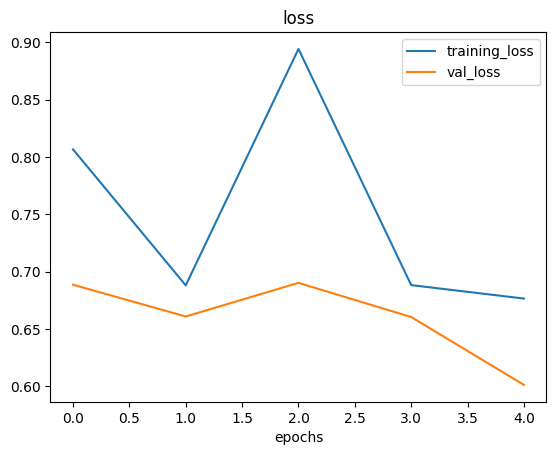

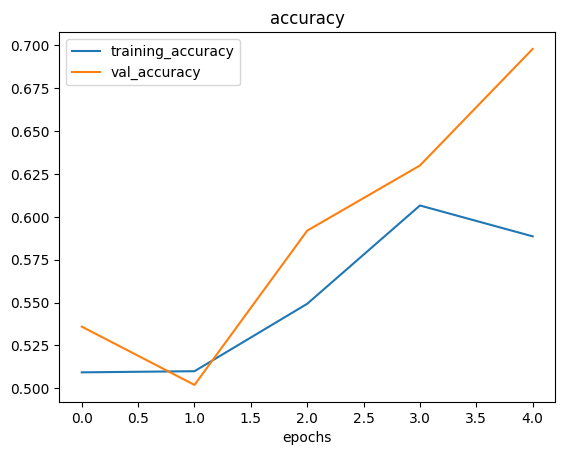

In [ ]:
plot_loss_curves(history_6)

In [ ]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224,224),
                                                                            class_mode='binary',
                                                                            batch_size=32,
                                                                            shuffle=True)

Found 1500 images belonging to 2 classes.


In [ ]:
model_7 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2)),
    tf.keras.layers.Conv2D(filters=10, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')])

model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 71s 1s/step - loss: 0.6502 - accuracy: 0.6480 - val_loss: 0.4824 - val_accuracy: 0.7700
Epoch 2/5
47/47 [==============================] - 65s 1s/step - loss: 0.5358 - accuracy: 0.7313 - val_loss: 0.4428 - val_accuracy: 0.8040
Epoch 3/5
47/47 [==============================] - 68s 1s/step - loss: 0.4767 - accuracy: 0.7780 - val_loss: 0.3475 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 69s 1s/step - loss: 0.4527 - accuracy: 0.7933 - val_loss: 0.3311 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 64s 1s/step - loss: 0.4576 - accuracy: 0.7993 - val_loss: 0.4413 - val_accuracy: 0.7760


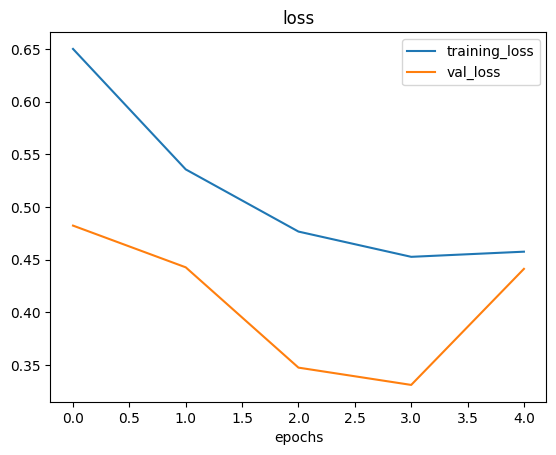

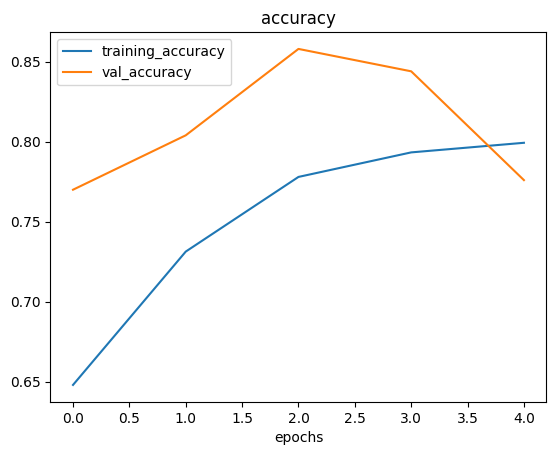

In [ ]:
plot_loss_curves(history_7)

In [ ]:
print(class_names)

['pizza' 'steak']


In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

steak = mpimg.imread('03-steak.jpeg')
plt.imshow(steak)
plt.axis(False)

FileNotFoundError: [Errno 2] No such file or directory: '03-steak.jpeg'

In [ ]:
steak.shape

In [ ]:
def load_and_prep_image(filename, img_shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size=[img_shape,img_shape])
  img = img/255

  return img


In [ ]:
# def load (filename):
#   img = mpimg.imread(filename)
#   img = tf.constant(img)
#   img = tf.image.resize(img,[224,224])
#   img = img/255

#   return img

In [ ]:
steak = load_and_prep_image('03-steak.jpeg', img_shape=224)

In [ ]:
steak

In [ ]:
tf.expand_dims(steak,axis=0)

In [ ]:
pred= model_7.predict(tf.expand_dims(steak,axis=0))
pred

In [ ]:
class_names

In [ ]:
pred_class = class_names[int(tf.round(pred))]
pred_class

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img,axis=0))

  pred_class = class_names[int(tf.round(pred))]

  plt.imshow(img)
  plt.title(f'Prediction : {pred_class}')
  plt.axis(False)

In [ ]:
pred_and_plot(model_7,'03-steak.jpeg')

In [ ]:
pred_and_plot(model_7,'shutterstock_2042520416-1.jpg')

In [3]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip', 'r')
zip_ref.extractall()
zip_ref.close()

--2024-03-30 11:18:41--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.207, 142.250.141.207, 142.251.2.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  78.6MB/s    in 7.1s    

2024-03-30 11:18:48 (69.3 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [4]:
import os

for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.')

There are 2 directories and 0 images in 10_food_classes_all_data.
There are 10 directories and 0 images in 10_food_classes_all_data/test.
There are 0 directories and 250 images in 10_food_classes_all_data/test/sushi.
There are 0 directories and 250 images in 10_food_classes_all_data/test/steak.
There are 0 directories and 250 images in 10_food_classes_all_data/test/ice_cream.
There are 0 directories and 250 images in 10_food_classes_all_data/test/fried_rice.
There are 0 directories and 250 images in 10_food_classes_all_data/test/hamburger.
There are 0 directories and 250 images in 10_food_classes_all_data/test/grilled_salmon.
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_wings.
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_curry.
There are 0 directories and 250 images in 10_food_classes_all_data/test/ramen.
There are 0 directories and 250 images in 10_food_classes_all_data/test/pizza.
There are 10 directories and 0 ima

In [5]:
train_dir = '10_food_classes_all_data/train'
test_dir = '10_food_classes_all_data/test'

In [6]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([items.name for items in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
    target_folder = os.path.join(target_dir, target_class)

    # List all files in the target folder
    all_files = os.listdir(target_folder)

    # Select a random file from the list
    random_image_name = np.random.choice(all_files)
    print(random_image_name)

    # Load the image
    img = mpimg.imread(os.path.join(target_folder, random_image_name))

    # Plot the image
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')

    print(f'Image Shape : {img.shape}')

    return img

115303.jpg
Image Shape : (383, 512, 3)


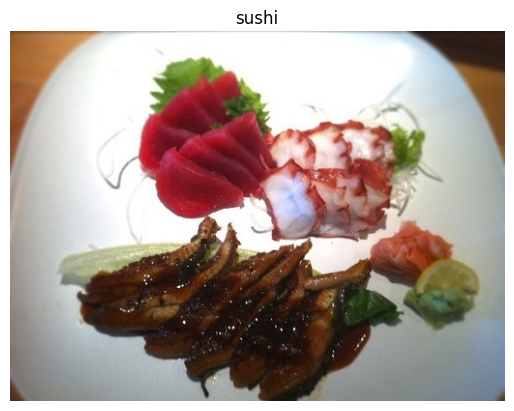

In [9]:
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [11]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model (very similar to previous models but actually the same as CNN explainer website)
model_8 = Sequential([
  Conv2D(10, 3, input_shape=(224, 224, 3)),
  Activation(activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax") # changed to have 10 output neurons and use the softmax activation function
])

# Compile the model
model_8.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:

# Fit the model
history_8 = model_8.fit(train_data, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 488s 2s/step - loss: 2.1409 - accuracy: 0.2267 - val_loss: 1.9556 - val_accuracy: 0.3104
Epoch 2/5
 37/235 [===>..........................] - ETA: 5:57 - loss: 1.9146 - accuracy: 0.3247

In [ ]:
plot_loss_curves(history_8)

In [ ]:
# How about we try and simplify the model first?
# Let's try to remove 2 convolutional layers...
model_9 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax")
])

model_9.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:

# Fit the model with 2x conv layers removed
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

In [ ]:
plot_loss_curves(history_9)

In [1]:

# Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="categorical")


NameError: name 'ImageDataGenerator' is not defined

In [ ]:
# Let's create another model but this time we'll fit it on the augmented training data of 10 classes
model_10 = tf.keras.models.clone_model(model_9)

# Compile the cloned model (using the same setup as previous models)
model_10.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

In [ ]:
# Fit the model
history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

In [ ]:
plot_loss_curves(history_10)

In [ ]:
# Download some custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

In [ ]:
# Reconfig pred_and_plot function to work with multi-class images
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add in logic for multi-class & get pred_class name
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [ ]:
pred = model_10.predict(tf.expand_dims("03-pizza-dad.jpeg", axis=0))

In [ ]:
# Make a prediction using model_10
pred_and_plot(model=model_10,
              filename="03-pizza-dad.jpeg",
              class_names=class_names)

In [ ]:
pred_and_plot(model=model_10,
              filename="03-steak.jpeg",
              class_names=class_names)

In [ ]:
pred_and_plot(model=model_10,
              filename="03-sushi.jpeg",
              class_names=class_names)

In [ ]:
pred_and_plot(model=model_10,
              filename="03-hamburger.jpeg",
              class_names=class_names)